# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from preparation import prepare_data, select_by_date_interval
from plotting import bar_plot_videos_per_h, get_videos_per_h_series

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df_full = prepare_data(PATH)
df_full.head(5)

start_date = "2022-07-15"
end_date = "2022-08-22"
df = select_by_date_interval(df_full, start=start_date, end=end_date)
df

,video_title,channel_name,time
35,China's Military Modernisation Speedrun - Budg...,Perun,2022-08-21 21:13:34.927000+03:00
36,Yoga For Beginners - A Little Goes a Long Way,Yoga With Adriene,2022-08-21 20:05:20.926000+03:00
37,Ace Combat 7 - Daredevil,Guilherme Pallas,2022-08-21 18:34:19.589000+03:00
38,How To Study With Zero Motivation,The Math Sorcerer,2022-08-21 17:19:25.434000+03:00
39,When Ace Combat Became Self Aware,Milchshake,2022-08-21 17:18:31.839000+03:00
...,...,...,...
1520,Deadman's Gun,Ashtar Command - Topic,2022-07-15 10:44:47.482000+03:00
1521,Subwoolfer - Give That Wolf A Banana - LIVE - ...,Eurovision Song Contest,2022-07-15 10:35:08.162000+03:00
1522,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-15 10:32:11.558000+03:00
1523,Can US HIMARS Rocket Artillery Make a Difference?,Task & Purpose,2022-07-15 10:09:46.571000+03:00


# 2. Explore

### 2.1 Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

Viva La Dirt League     59
Історія Без Міфів       44
STERNENKO               41
gameranx                30
КОМУ ВНИЗ               25
                        ..
Welshly Arms - Topic     1
1theK (원더케이)             1
Аудіокнига.UA            1
iqweent                  1
Jamie Lidell - Topic     1
Name: channel_name, Length: 500, dtype: Int64

### 2.2 Plot n most watched channels

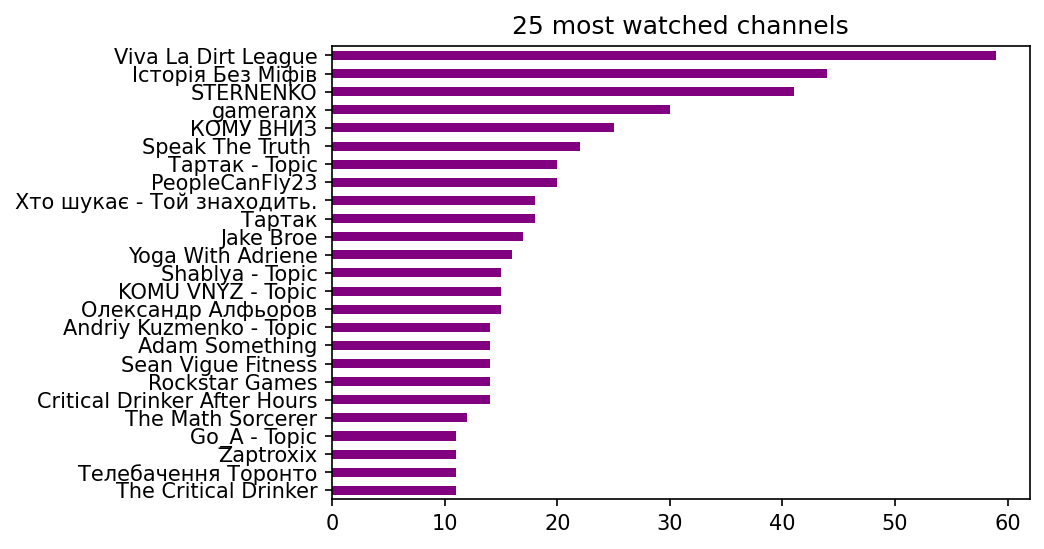

In [5]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()

In [6]:
top_n_channels

Viva La Dirt League             59
Історія Без Міфів               44
STERNENKO                       41
gameranx                        30
КОМУ ВНИЗ                       25
Speak The Truth                 22
Тартак - Topic                  20
PeopleCanFly23                  20
Хто шукає - Той знаходить.      18
Тартак                          18
Jake Broe                       17
Yoga With Adriene               16
Shablya - Topic                 15
KOMU VNYZ - Topic               15
Олександр Алфьоров              15
Andriy Kuzmenko - Topic         14
Adam Something                  14
Sean Vigue Fitness              14
Rockstar Games                  14
Critical Drinker After Hours    14
The Math Sorcerer               12
Go_A - Topic                    11
Zaptroxix                       11
Телебачення Торонто             11
The Critical Drinker            11
Name: channel_name, dtype: Int64

### 2.3 Count on how many videos you clicked per hour

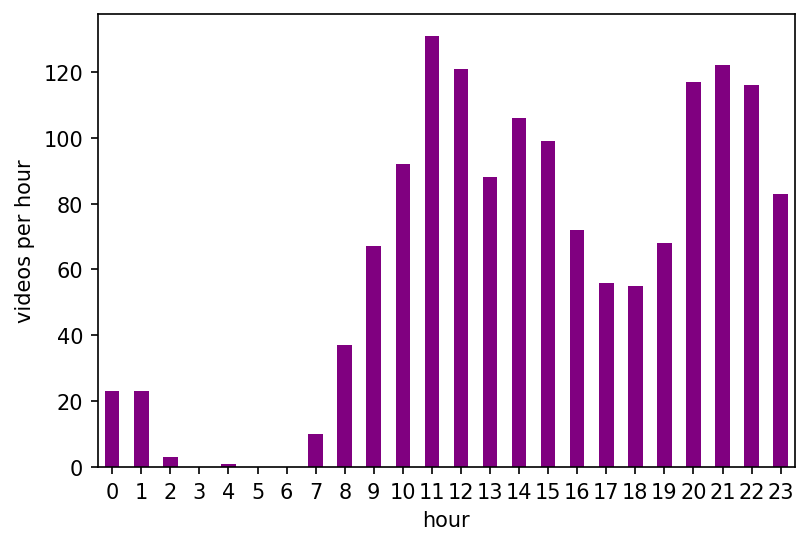

In [18]:
bar_plot_videos_per_h(df)

<AxesSubplot:>

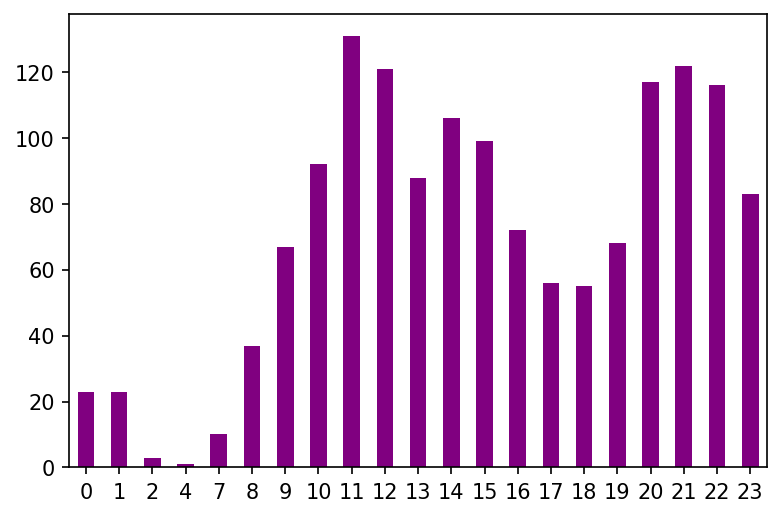

In [16]:
hours = pd.DatetimeIndex(df['time']).hour # get hours from datetime
hours = hours.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
hours.plot.bar(color="purple", rot=0)

### 2.4 Discover at what hours you watch a particular channel 

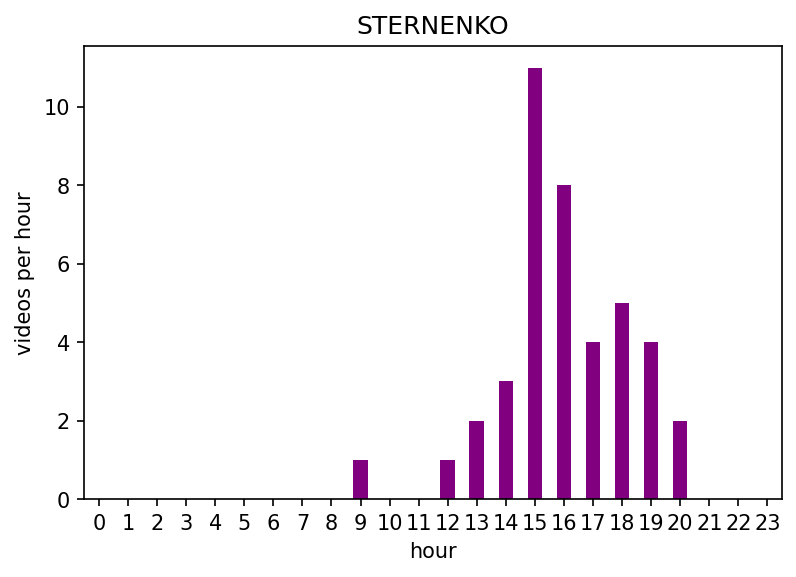

In [17]:
channel_name_to_look = "STERNENKO"
bar_plot_videos_per_h(df, channel_name_to_look)

### 2.5 Plot videos count per hour for several channels

In [9]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['Viva La Dirt League',
 'Історія Без Міфів',
 'STERNENKO',
 'gameranx',
 'КОМУ ВНИЗ',
 'Speak The Truth ',
 'Тартак - Topic',
 'PeopleCanFly23',
 'Хто шукає - Той знаходить.',
 'Тартак',
 'Jake Broe',
 'Yoga With Adriene',
 'Shablya - Topic',
 'KOMU VNYZ - Topic',
 'Олександр Алфьоров',
 'Andriy Kuzmenko - Topic',
 'Adam Something',
 'Sean Vigue Fitness',
 'Rockstar Games',
 'Critical Drinker After Hours',
 'The Math Sorcerer',
 'Go_A - Topic',
 'Zaptroxix',
 'Телебачення Торонто',
 'The Critical Drinker']

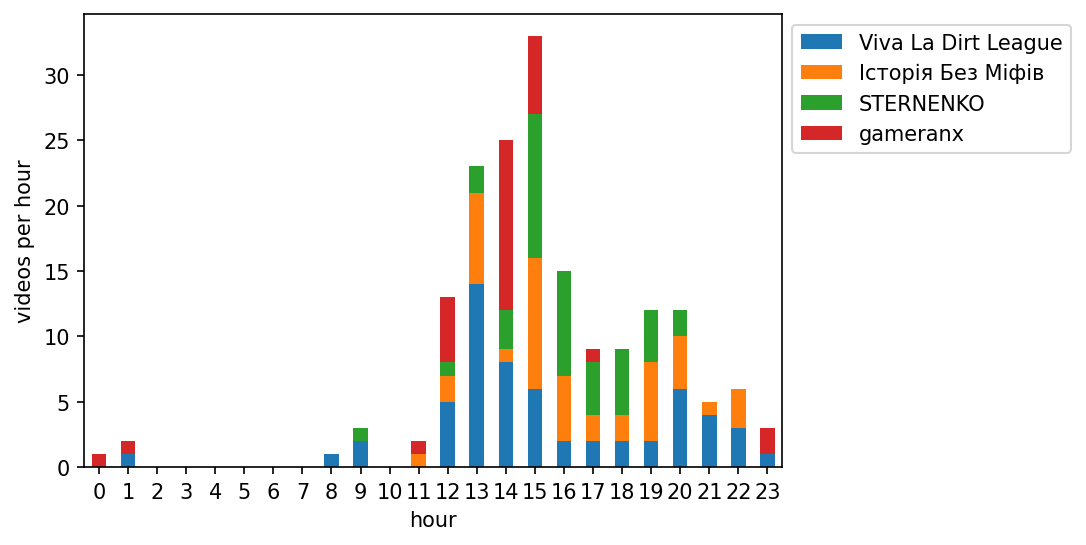

In [10]:
start_point = 0
interval = 4
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### 2.6 Count how many videos you click per day of week

C:\Users\San\AppData\Local\Temp\ipykernel_1724\4212113935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['time'].dt.strftime('%a')


Mon    150
Tue    174
Wed    208
Thu    194
Fri    298
Sat    196
Sun    270
Name: weekday, dtype: int64

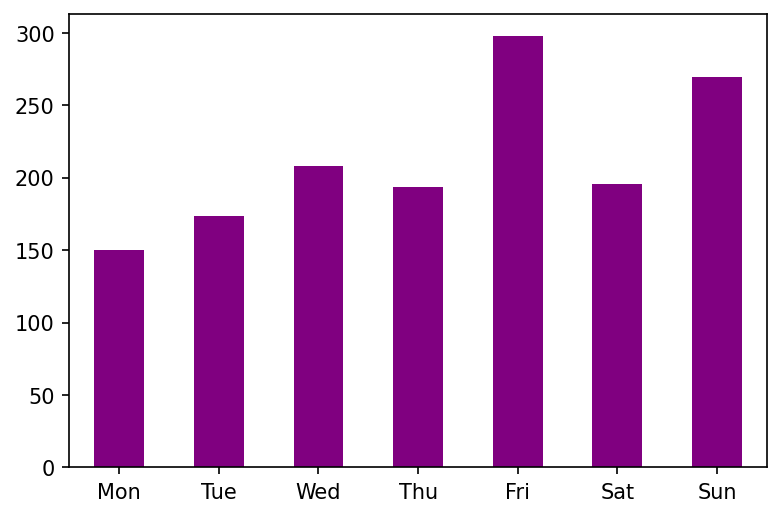

In [11]:
df['weekday'] = df['time'].dt.strftime('%a')
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)
videos_per_weekday

# Work with recent data

In [12]:
start_date = "2022-07-15"
end_date = "2022-08-15"
df1 = select_by_date_interval(df, start=start_date, end=end_date)
df1

,video_title,channel_name,time,weekday
290,The Chronicles of Riddick - A Very Unexpected ...,The Critical Drinker,2022-08-14 23:45:03.793000+03:00,Sun
291,100% розгром по фактам. + смішний факт про рам...,Андрій Попик,2022-08-14 23:28:49.092000+03:00,Sun
292,Росіяни – людожери? Так! | Історія для дорослих,Історія для дорослих,2022-08-14 22:25:37.268000+03:00,Sun
293,😂 Воділа Хімарса - Бавовна в Криму #26,SAMOKHVALOV,2022-08-14 22:21:21.147000+03:00,Sun
294,КОГО НАСПРАВДІ НАЗИВАЛИ КАЦАПАМИ. Пояснення ук...,Олександр Алфьоров,2022-08-14 21:50:14.138000+03:00,Sun
...,...,...,...,...
1520,Deadman's Gun,Ashtar Command - Topic,2022-07-15 10:44:47.482000+03:00,Fri
1521,Subwoolfer - Give That Wolf A Banana - LIVE - ...,Eurovision Song Contest,2022-07-15 10:35:08.162000+03:00,Fri
1522,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-15 10:32:11.558000+03:00,Fri
1523,Can US HIMARS Rocket Artillery Make a Difference?,Task & Purpose,2022-07-15 10:09:46.571000+03:00,Fri


In [13]:
df.head()

,video_title,channel_name,time,weekday
35,China's Military Modernisation Speedrun - Budg...,Perun,2022-08-21 21:13:34.927000+03:00,Sun
36,Yoga For Beginners - A Little Goes a Long Way,Yoga With Adriene,2022-08-21 20:05:20.926000+03:00,Sun
37,Ace Combat 7 - Daredevil,Guilherme Pallas,2022-08-21 18:34:19.589000+03:00,Sun
38,How To Study With Zero Motivation,The Math Sorcerer,2022-08-21 17:19:25.434000+03:00,Sun
39,When Ace Combat Became Self Aware,Milchshake,2022-08-21 17:18:31.839000+03:00,Sun


### Plot n most watched channels based on the most recent data